In [1]:
#from google.colab import drive
#from google.colab import files
import os
from lib.train_AI_lib import *

In [2]:
os.chdir('..')
print(os.getcwd())

c:\Users\kevin\Documents\GitHub\APS360-2020Summer-Project


In [3]:
import cv2
#### Filters we want to use ####
edgeDetect  = lambda oImg: cv2.Canny(oImg, 100, 100)
edgeDetect2 = lambda fImg: cv2.Canny(fImg, 175, 250)
laplacian   = lambda pImg: cv2.Laplacian(cv2.cvtColor(pImg, cv2.COLOR_BGR2GRAY),cv2.CV_64F)
gradient    = lambda gImg: cv2.morphologyEx(cv2.cvtColor(gImg, cv2.COLOR_BGR2GRAY), cv2.MORPH_GRADIENT, (5,5))
opening     = lambda cImg: cv2.morphologyEx(cv2.cvtColor(cImg, cv2.COLOR_BGR2GRAY), cv2.MORPH_OPEN, (5,5))
bilateral   = lambda bImg: cv2.bilateralFilter(cv2.cvtColor(bImg, cv2.COLOR_BGR2GRAY),9,100,100)
grayscale   = lambda rImg: cv2.cvtColor(rImg, cv2.COLOR_BGR2GRAY)

In [4]:
class CNN(nn.Module):
    def __init__(self, name):
        super(CNN, self).__init__()
        self.name = name

        self.conv1 = nn.Conv2d(1,   15,  6, stride=2)  # n = 1024 -> 510
        self.conv2 = nn.Conv2d(15,  30,  6, stride=2)  # n = 510  -> 253
        self.pool1 = nn.MaxPool2d(3, 2)                # n = 253  -> 126
        self.conv3 = nn.Conv2d(30,  60,  6, stride=2)  # n = 126  -> 61
        self.pool2 = nn.MaxPool2d(4, 2)                # n = 61   -> 29

        self.fc1   = nn.Linear(29*29*60, 20)
        self.fc2   = nn.Linear(20, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = self.pool2(F.relu(self.conv3(x)))
        x = x.view(-1, 29*29*60)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return(x)

In [5]:
class CNN_3Chan(nn.Module):
    def __init__(self, name):
        super(CNN_3Chan, self).__init__()
        self.name = name

        self.conv1 = nn.Conv2d(3,   15,  6, stride=2)  # n = 1024 -> 510
        self.conv2 = nn.Conv2d(15,  30,  6, stride=2)  # n = 510  -> 253
        self.pool1 = nn.MaxPool2d(3, 2)                # n = 253  -> 126
        self.conv3 = nn.Conv2d(30,  60,  6, stride=2)  # n = 126  -> 61
        self.pool2 = nn.MaxPool2d(4, 2)                # n = 61   -> 29

        self.fc1   = nn.Linear(29*29*60, 20)
        self.fc2   = nn.Linear(20, 1)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = self.pool2(F.relu(self.conv3(x)))
        x = x.view(-1, 29*29*60)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return(x)

## Edge Detection

In [ ]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': edgeDetect})

In [ ]:
torch.cuda.is_available()

In [ ]:
my_model = CNN(name = "edgeDetect")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

In [ ]:
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': edgeDetect})
netPath = "/content/APS360-2020Summer-Project/saved/TrainingRuns/RegAdamTrainer/edgeDetect_b32_te20_lr0.001"
regresAnalysis(my_model, trainLoader, netPath)


## Edge Detection v2

In [ ]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': edgeDetect2})

In [ ]:
my_model = CNN(name = "edgeDetect2")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

In [ ]:
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': edgeDetect2})
netPath = "/content/APS360-2020Summer-Project/saved/TrainingRuns/RegAdamTrainer/edgeDetect2_b32_te20_lr0.001"
regresAnalysis(my_model, trainLoader, netPath)


## laplacian

In [ ]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': laplacian})

In [ ]:
my_model = CNN(name = "laplacian")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

In [ ]:
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': laplacian})
netPath = "/content/APS360-2020Summer-Project/saved/TrainingRuns/RegAdamTrainer/laplacian_b32_te20_lr0.001"
regresAnalysis(my_model, trainLoader, netPath)


## gradient

In [ ]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': gradient})

In [ ]:
my_model = CNN(name = "gradient")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

In [ ]:
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': gradient})
netPath = "/content/APS360-2020Summer-Project/saved/TrainingRuns/RegAdamTrainer/gradient_b32_te20_lr0.001"
regresAnalysis(my_model, trainLoader, netPath)

## opening

In [ ]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': opening})

In [ ]:
my_model = CNN(name = "opening")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

In [ ]:
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': opening})
netPath = "/content/APS360-2020Summer-Project/saved/TrainingRuns/RegAdamTrainer/opening_b32_te20_lr0.001"
regresAnalysis(my_model, trainLoader, netPath)

## Bilateral

In [ ]:
# make dataloaders
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': bilateral})

In [ ]:
my_model = CNN(name = "bilateral")
use_cuda = True

if use_cuda and torch.cuda.is_available():
  my_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

trainNet(net = my_model,
         data = [trainLoader, valLoader], 
         batchsize = 32, 
         epochNo = 20, 
         lr = 0.001)

In [ ]:
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': bilateral})
netPath = "/content/APS360-2020Summer-Project/saved/TrainingRuns/RegAdamTrainer/bilateral_b32_te20_lr0.001"
regresAnalysis(my_model, trainLoader, netPath)

# Using semi-supervised model

### encD + greyscale image

In [ ]:
trainLoader, valLoader, testLoader = loadData(batchsize = 32, inPath='saved/autEncMasked/autEncD', args = {'func': grayscale, 'cuda':1})
my_model = CNN(name = "CNN_encD"); my_model.cuda()
trainNet(net = my_model, data = [trainLoader, valLoader], batchsize = 32, epochNo = 20, lr = 0.001)


In [ ]:
netPath = "saved/TrainingRuns/RegAdamTrainer/CNN_encD_b32_te20_lr0.001"
my_model = CNN(name="CNN_encD"); my_model.cuda()
my_model.load_state_dict(torch.load(netPath+"/model_epoch19"))
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': grayscale}, inPath='saved/autEncMasked/autEncD')
regresAnalysis(my_model, trainLoader, netPath, mode='train')

In [ ]:
netPath = "saved/TrainingRuns/RegAdamTrainer/CNN_encD_b32_te20_lr0.001"
my_model = CNN(name="CNN_encD"); my_model.cuda()
my_model.load_state_dict(torch.load(netPath+"/model_epoch19"))
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': grayscale})
regresAnalysis(my_model, valLoader, netPath, mode='val')

In [ ]:
netPath = "saved/TrainingRuns/RegAdamTrainer/CNN_encD_b32_te20_lr0.001"
my_model = CNN(name="CNN_encD"); my_model.cuda()
my_model.load_state_dict(torch.load(netPath+"/model_epoch19"))
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': grayscale})
regresAnalysis(my_model, testLoader, netPath, mode='test')

### encD, 3 channels

In [ ]:
trainLoader, valLoader, testLoader = loadData(batchsize = 45, inPath='saved/autEncMasked/autEncD')
my_model = CNN_3Chan(name = "CNN_encD_3Chan"); my_model.cuda()
trainNet(net = my_model, data = [trainLoader, valLoader], batchsize = 45, epochNo = 30, lr = 0.001)

In [ ]:
netPath = "saved/TrainingRuns/RegAdamTrainer/CNN_encD_3Chan_b32_te25_lr0.001"
my_model = CNN_3Chan(name="CNN_encD_3Chan"); my_model.cuda()
my_model.load_state_dict(torch.load(netPath+"/model_epoch22"))
trainLoader, valLoader, testLoader = loadData(batchsize = 1, inPath='saved/autEncMasked/autEncD')
regresAnalysis(my_model, trainLoader, netPath, mode='train')

In [ ]:
netPath = "saved/TrainingRuns/RegAdamTrainer/CNN_encD_3Chan_b32_te25_lr0.001"
my_model = CNN_3Chan(name="CNN_encD_3Chan"); my_model.cuda()
my_model.load_state_dict(torch.load(netPath+"/model_epoch22"))
trainLoader, valLoader, testLoader = loadData(batchsize = 1, inPath='saved/autEncMasked/autEncD')
regresAnalysis(my_model, valLoader, netPath, mode='val')

Tested 99.71%

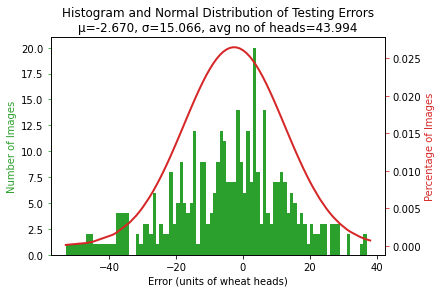

In [6]:
netPath = "saved/TrainingRuns/RegAdamTrainer/CNN_encD_3Chan_b32_te25_lr0.001"
my_model = CNN_3Chan(name="CNN_encD_3Chan"); my_model.cuda()
my_model.load_state_dict(torch.load(netPath+"/model_epoch22"))
trainLoader, valLoader, testLoader = loadData(batchsize = 1, inPath='saved/autEncMasked/autEncD')
_=regresAnalysis(my_model, testLoader, netPath, mode='test')

In [7]:
print(len(trainLoader))
print(len(valLoader))
print(len(testLoader))

2738
342
342


### encD + edgeDetect

In [ ]:
trainLoader, valLoader, testLoader = loadData(batchsize = 32, args = {'func': edgeDetect2})
my_model = CNN(name = "CNN_edgeDetect2_encD"); my_model.cuda()
trainNet(net = my_model, data = [trainLoader, valLoader], batchsize = 32, epochNo = 20, lr = 0.001)

In [ ]:
netPath = "/content/APS360-2020Summer-Project/saved/TrainingRuns/RegAdamTrainer/CNN_edgeDetect2_encD_b32_te20_lr0.001"
trainLoader, valLoader, testLoader = loadData(batchsize = 1, args = {'func': edgeDetect2})
regresAnalysis(my_model, trainLoader, netPath)

# Filter Testing

In [ ]:
filepath = '/content/APS360-2020Summer-Project/data/working-wheat-data/train/0a3cb453f.jpg'

# Edge Detect 2
img   = cv2.imread(filepath)
edges = cv2.Canny(img,175,250)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Det 2'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Edge Detect 1
img   = cv2.imread(filepath)
edges = cv2.Canny(img,100,100)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Det 1'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Bilateral
img  = cv2.imread(filepath)
imgf = cv2.bilateralFilter(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),9,100,100)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgf,cmap = 'gray')
plt.title('Bilateral'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Edge Det and Bilateral
img  = cv2.imread(filepath)
imgf = cv2.bilateralFilter(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),9,75,50)
imgf = cv2.Canny(imgf,125,250)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgf,cmap = 'gray')
plt.title('Bilateral + Edge Det'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# laplacian
img  = cv2.imread(filepath)
imgf = cv2.Laplacian(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),cv2.CV_64F)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgf,cmap = 'gray')
plt.title('laplacian'), plt.xticks([]), plt.yticks([])
plt.show()